<a href="https://colab.research.google.com/github/82everywin/Python_AI_6/blob/master/0_3_%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 에일리언 vs 프레데터 데이터셋**

- https://www.kaggle.com/datasets/pmigdal/alien-vs-predator-images
- 로그인 ->  
> {"username":"gustmd","key":"731124c3eee942e6dd673aee21e27c03"}

In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'gustmd'
os.environ['KAGGLE_KEY']= '731124c3eee942e6dd673aee21e27c03'

In [ ]:
!kaggle datasets download -d pmigdal/alien-vs-predator-images

 78% 11.0M/14.1M [00:00<00:00, 19.6MB/s]
100% 14.1M/14.1M [00:00<00:00, 15.7MB/s]


In [ ]:
!unzip -q alien-vs-predator-images.zip

# **2. 이미지 증강 기법 (Image Augmentation)**
- 원본 이미지(데이터)를 조작하여 원본과는 크고 작은 변화를 가진 이미지를 생성
  - 모델 성능이 좋아짐
  - 오버피팅을 방지
  


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

In [ ]:
data_transforms = {
    'train' : transforms.Compose([ # Compose 함수는 리스트 안에 들어있는 함수들을  동시에 실행한다.
        transforms.Resize((224,224)),
        # 기존 영상은 그대로 두고, 각도를 10도 돌리고, 크기도 80~120 까지 랜덤으로!
        transforms.RandomAffine(0,shear = 10, scale = (0.8, 1.2)),
        # 이미지를 수평으로 눕힌다.
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ]),
    'validation' : transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor()
    ])
}

In [ ]:
def target_transforms(target):
  return torch.FloatTensor([target])

In [ ]:
image_datasets = {
    'train' : datasets.ImageFolder('data/train', data_transforms['train'],target_transform = target_transforms),
    'validation' :datasets.ImageFolder('data/validation',data_transforms['validation'],target_transform = target_transforms)
}

In [ ]:
dataloaders = {
    'train' : DataLoader(
        image_datasets['train'],
        batch_size = 32,
        shuffle = True
    ),
    'validation' : DataLoader(
        image_datasets['validation'],
        batch_size = 32,
        shuffle = True
    )
}

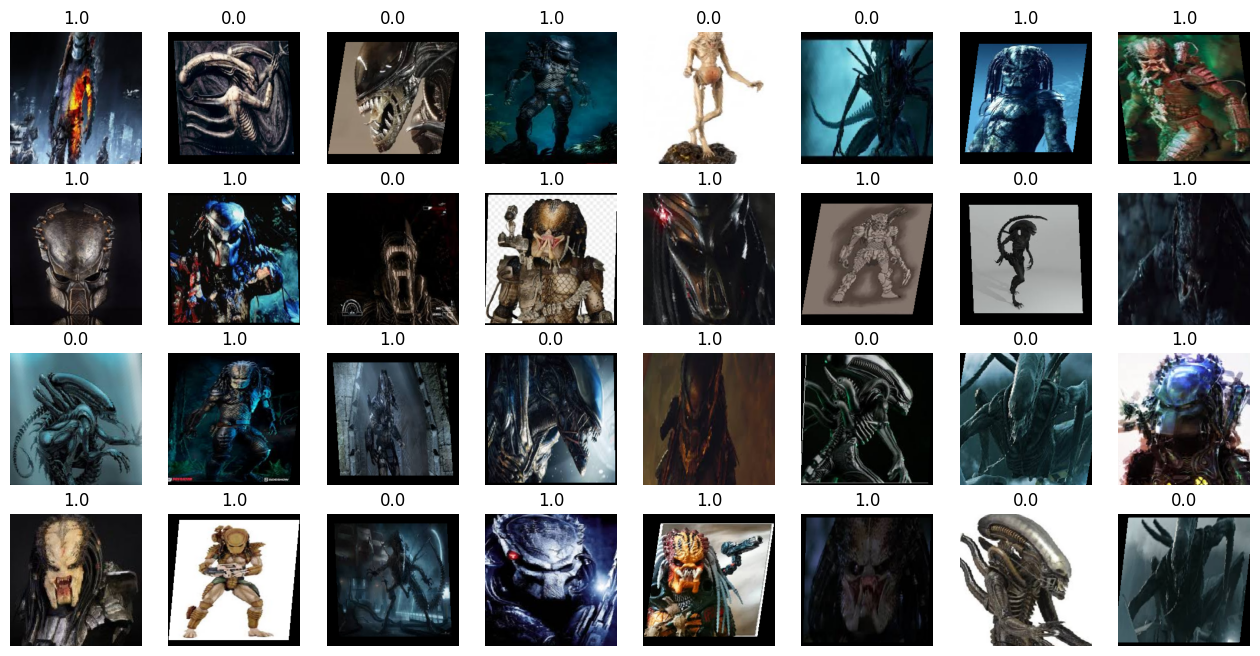

In [ ]:
imgs, labels = next(iter(dataloaders['train']))

fig, axes = plt.subplots(4, 8, figsize = (16, 8))
for axes, img, label in zip(axes.flatten(), imgs, labels):
  axes.imshow(img.permute(1,2,0))
  axes.set_title(label.item())
  axes.axis('off')

# **3. 전이 학습 (Transfer Learning)**

- 하나의 작업을 위해 훈련된 모델을 유사 작업 수행 모델의 시작점으로 활용하는 딥러닝 접근법
- 신경망은 처음부터 새로 학습하는 것보다 전이 학습을 통해 업데이트하고 재학습하는 편이 더 빠르고 간편함
- 전이 학습은 여러 응용 분야 중에서 특히 검출, 영상 인식, 음성 인식에 많이 사용

3-1, 전이 학습의 고려할 점
- 크기 : 모델 크기는 배포할 위치와 방법에 따라 달라짐
- 예측 속도와 정확도 : 하드웨어 및 배치 크기와 같은 요소를 작업
![](https://kr.mathworks.com/discovery/transfer-learning/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1634621302937.jpg)

# **4. 사전 학습된 ResNet50 모델**

![](https://i.stack.imgur.com/gI4zT.png)

In [ ]:
4-1. 이미지넷
